In [1]:
import johnny_deep

from importlib import reload
reload(johnny_deep.models)
reload(johnny_deep.utils)

<module 'johnny_deep.utils' from '/Users/marco/Desktop/johnny_deep/johnny_deep/utils.py'>

In [2]:
import numpy as np

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [5]:
X, Y = make_moons(n_samples=1000, noise=0.10, random_state=100)

In [6]:
Y[np.random.random(Y.shape[0]) < 0.3] = 1
Y[np.random.random(Y.shape[0]) < 0.3] = 0

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
X_train = X_train.transpose()
X_test = X_test.transpose()
del X, Y

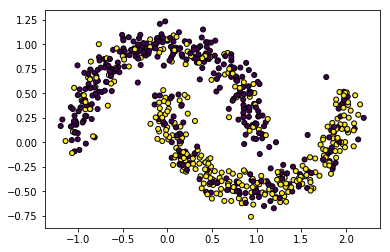

In [8]:
plt.scatter(X_train[0, :], X_train[1, :], marker='o', c=Y_train, s=25, edgecolor='k')

In [9]:
nn_architecture = [
    {"dimension": 2, "type": "input"},
#     {"dimension": 40, "type": "relu"},
#     {"dimension": 40, "type": "relu"},
#     {"dimension": 40, "type": "relu"},

    {"dimension": 40, "type": "relu", "dropout": 0.2},
    {"dimension": 40, "type": "relu"},
    {"dimension": 40, "type": "relu", "dropout": 0.2},
    
    {"dimension": 1, "type": "sigmoid"},
]

In [10]:
m = johnny_deep.models.Model(nn_architecture)

In [11]:
m.model_info()

Layer 1: relu with dimension 40
W shape: (40, 2)
b shape: (40, 1)
Layer 2: relu with dimension 40
W shape: (40, 40)
b shape: (40, 1)
Layer 3: relu with dimension 40
W shape: (40, 40)
b shape: (40, 1)
Layer 4: sigmoid with dimension 1
W shape: (1, 40)
b shape: (1, 1)


In [12]:
m.fit(X_train, Y_train, 2000, 0.3, mini_batch_size=32)

Epoch 100 - cost 0.5946962893739725
Epoch 200 - cost 0.5980809360424916
Epoch 300 - cost 0.5972263315549504
Epoch 400 - cost 0.5905424070397773
Epoch 500 - cost 0.5824870709794108
Epoch 600 - cost 0.5897029850155809
Epoch 700 - cost 0.5938273270816976
Epoch 800 - cost 0.5811230246648886
Epoch 900 - cost 0.5865269315495241
Epoch 1000 - cost 0.5832688598265865
Epoch 1100 - cost 0.5926602949982417
Epoch 1200 - cost 0.593323586372833
Epoch 1300 - cost 0.5922902240684922
Epoch 1400 - cost 0.5792332001997993
Epoch 1500 - cost 0.5856295355834931
Epoch 1600 - cost 0.5843771946320224
Epoch 1700 - cost 0.571235367491856
Epoch 1800 - cost 0.5870218368182816
Epoch 1900 - cost 0.5778939451981387
Epoch 2000 - cost 0.5732874897795911


In [13]:
def plot_w_boundary(X, Y_hat):
    xx = np.linspace(X[0].min(), X[0].max(), 100)
    yy = np.linspace(X[1].min(), X[1].max(), 100)

    xy1, xy2 = np.meshgrid(xx, yy)

    grid = np.vstack([xy1.flatten(), xy2.flatten()])
    background = m.forward(grid)

    Y_pred = johnny_deep.utils.convert_prob_into_class(Y_hat)
    background = johnny_deep.utils.convert_prob_into_class(background)
    plt.scatter(grid[0,:], grid[1,:], c = background, alpha = 0.05)
    plt.scatter(X[0, :], X[1, :], marker='o', c=Y_pred, edgecolor='k')

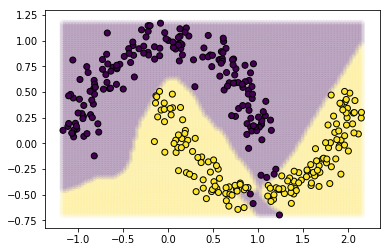

In [14]:
Y_hat = m.forward(X_test)
Y_pred = johnny_deep.utils.convert_prob_into_class(Y_hat)
# plt.scatter(X_test[0, :], X_test[1, :], marker='o', c=Y_pred, edgecolor='k')
plot_w_boundary(X_test, Y_hat)